# LAB 4 - LOGISTIC REGRESSION / LDA

This lab is comprised of two main sections:

- 1. Logistic Regression with numerical + categorical variables

- 2. Linear Discriminant Analysis

In this lab we will use the help of statistical packages `statsmodels` and also `sklearn` for plotting and for splitting. These are two of the most complete libraries for statistical modeling in Python.

## 1. LOGISTIC REGRESSION (NUMERICAL + CATEGORICAL VARIABLES)

#### 1.1 Data Loading

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [3]:
churn = pd.read_csv("customerchurn.csv")
churn.info()
churn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 7 columns):
Churn              7032 non-null int64
MonthlyCharges     7032 non-null float64
SeniorCitizen      7032 non-null int64
PaymentMethod      7032 non-null object
InternetService    7032 non-null object
tenure             7032 non-null int64
Contract           7032 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 384.7+ KB


,Churn,MonthlyCharges,SeniorCitizen,PaymentMethod,InternetService,tenure,Contract
0,0,29.85,0,Electronic check,DSL,1,Month-to-month
1,0,56.95,0,Mailed check,DSL,34,One year
2,1,53.85,0,Mailed check,DSL,2,Month-to-month
3,0,42.30,0,Bank transfer,DSL,45,One year
4,1,70.70,0,Electronic check,Fiber optic,2,Month-to-month


#### 1.2 Train Test Split

In [4]:
churn_train, churn_test = train_test_split(churn, test_size=0.3, random_state=88)
churn_train.shape, churn_test.shape

((4922, 7), (2110, 7))

#### 1.3 Model Fitting and Variable Selection

In [5]:
logreg2 = smf.logit(formula = 'Churn ~ MonthlyCharges + SeniorCitizen + PaymentMethod + InternetService + tenure + Contract',
                       data = churn_train).fit()
print(logreg2.summary())

Optimization terminated successfully.
         Current function value: 0.421913
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4911
Method:                           MLE   Df Model:                           10
Date:                Fri, 24 Sep 2021   Pseudo R-squ.:                  0.2695
Time:                        12:18:48   Log-Likelihood:                -2076.7
converged:                       True   LL-Null:                       -2842.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.8982      0.213     -4

In [6]:
# Let's remove MonthlyCharges
logreg3 = smf.logit(formula = 'Churn ~ SeniorCitizen + PaymentMethod + InternetService + tenure + Contract',
                       data = churn_train).fit()
print(logreg3.summary())

Optimization terminated successfully.
         Current function value: 0.422264
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4912
Method:                           MLE   Df Model:                            9
Date:                Fri, 24 Sep 2021   Pseudo R-squ.:                  0.2688
Time:                        12:19:37   Log-Likelihood:                -2078.4
converged:                       True   LL-Null:                       -2842.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.5748      0.122     -4

In [7]:
# Let's remove PaymentMethod Credit Card and PaymentMethodMailed check. 
# How do we do this? Create a new feature. 

churn_train2 = churn_train.copy() 
churn_train2['ElectronicCheck'] = (churn_train2['PaymentMethod'] == 'Electronic check').astype('int64')
churn_train2.drop(columns=['PaymentMethod'], inplace=True)

# Let's do the same for test set as well

churn_test2 = churn_test.copy() 
churn_test2['ElectronicCheck'] = (churn_test2['PaymentMethod'] == 'Electronic check').astype('int64')
churn_test2.drop(columns=['PaymentMethod'], inplace=True)

churn_test2.head()

,Churn,MonthlyCharges,SeniorCitizen,InternetService,tenure,Contract,ElectronicCheck
2839,1,99.60,1,Fiber optic,4,Month-to-month,1
4965,0,93.80,1,Fiber optic,13,Month-to-month,0
6686,0,96.55,0,Fiber optic,5,Month-to-month,1
4151,0,25.20,0,No,39,Two year,0
241,0,109.20,0,Fiber optic,72,Two year,0


In [8]:
logreg4 = smf.logit(formula = 'Churn ~ SeniorCitizen + ElectronicCheck + InternetService + tenure + Contract',
                       data = churn_train2).fit()
print(logreg4.summary())

Optimization terminated successfully.
         Current function value: 0.422336
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4914
Method:                           MLE   Df Model:                            7
Date:                Fri, 24 Sep 2021   Pseudo R-squ.:                  0.2687
Time:                        12:23:34   Log-Likelihood:                -2078.7
converged:                       True   LL-Null:                       -2842.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.6254      0.085     -7.363     

#### 1.4 Predicting the Probabilty and Deciding the Threshold & Confusion Matrix


Now we have our probabiltiy of default, we can construct a confusion matrix based on decision tree threshold we have computed price reduction = 800 and no price reduction = 1000 
$$
800 (1 - p/2) = 1000 (1 - p) \implies p = 0.333 
$$
- High churn risk > 0.333.
- low churn risk < 0.333 

The expected return of discount is higher than no discount, b/c the prob of retention is lower for no discount 


Recall: Confusion matrix
$$\begin{bmatrix} TN & FP \\ FN & TP \end{bmatrix}$$

In [9]:
# Confusion matrices based on decision tree threshold 
# Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers).

from sklearn.metrics import confusion_matrix

y_test = churn_test2['Churn']
y_prob = logreg4.predict(churn_test2)
y_pred = pd.Series([1 if x > 1/3 else 0 for x in y_prob], index=y_prob.index)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[1213  329]
 [ 154  414]]


### ROC Curves

The ROC curve plots the TPR and FPR for every break-even threshold p between 0.0 and 1.0

In [10]:
y_train = churn_train2['Churn']
X_train = churn_train2.drop(['Churn'], axis=1)

y_test = churn_test2['Churn']
X_test = churn_test2.drop(['Churn'], axis=1)

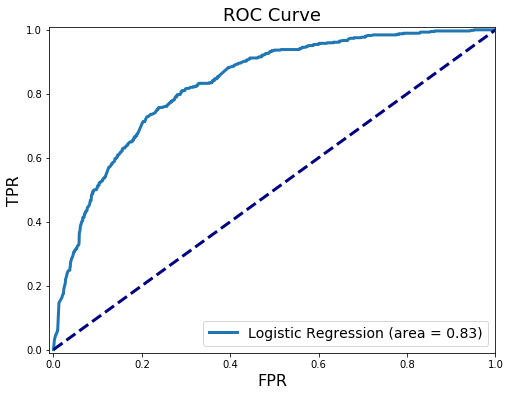

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()

# ------------------------------------------------------------------------------------------

## 2. Linear Discriminant Analysis

#### 2.1 Preliminary: one-hot encoding

In [13]:
from sklearn.preprocessing import OneHotEncoder
# initialize the OneHotEncoder
drop_enc = OneHotEncoder(drop='first').fit(X_train[['InternetService','Contract']])
print(drop_enc.categories_)

[array(['DSL', 'Fiber optic', 'No'], dtype=object), array(['Month-to-month', 'One year', 'Two year'], dtype=object)]


In [14]:
X_train

,MonthlyCharges,SeniorCitizen,InternetService,tenure,Contract,ElectronicCheck
5224,101.15,0,Fiber optic,8,Month-to-month,1
3321,70.15,1,DSL,38,One year,0
6427,79.60,0,DSL,70,Two year,0
4061,19.50,0,No,14,One year,0
473,53.60,0,DSL,24,Month-to-month,0
...,...,...,...,...,...,...
362,50.30,0,DSL,58,One year,0
2481,90.45,0,Fiber optic,28,One year,1
4047,56.25,1,DSL,34,Month-to-month,1
6432,55.35,0,DSL,17,Month-to-month,0


In [15]:
# Perform the transformation for both the training and the test set.

X_train_categorical = drop_enc.transform(X_train[['InternetService','Contract']]).toarray()
X_train_numerical = X_train[['MonthlyCharges','SeniorCitizen','tenure']].values

# combine the numerical variables and the one-hot encoded categorical variables
X_train_transformed = np.concatenate((X_train_numerical,X_train_categorical), axis = 1)

X_test_categorical = drop_enc.transform(X_test[['InternetService','Contract']]).toarray()
X_test_numerical = X_test[['MonthlyCharges','SeniorCitizen','tenure']].values
X_test_transformed = np.concatenate((X_test_numerical,X_test_categorical), axis = 1)

X_train_transformed

array([[101.15,   0.  ,   8.  , ...,   0.  ,   0.  ,   0.  ],
       [ 70.15,   1.  ,  38.  , ...,   0.  ,   1.  ,   0.  ],
       [ 79.6 ,   0.  ,  70.  , ...,   0.  ,   0.  ,   1.  ],
       ...,
       [ 56.25,   1.  ,  34.  , ...,   0.  ,   0.  ,   0.  ],
       [ 55.35,   0.  ,  17.  , ...,   0.  ,   0.  ,   0.  ],
       [ 20.1 ,   0.  ,  31.  , ...,   1.  ,   1.  ,   0.  ]])

#### 2.2 Model Fitting and Prediction Making

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_transformed, y_train)

y_prob_lda = lda.predict_proba(X_test_transformed)
y_pred_lda = pd.Series([1 if x > 1/3 else 0 for x in y_prob_lda[:,1]], index=y_prob.index)

cm = confusion_matrix(y_test, y_pred_lda)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_lda))

Confusion Matrix: 
 [[1206  336]
 [ 163  405]]

Accuracy: 0.7635071090047393


#### 2.3 Plot the ROC Curve

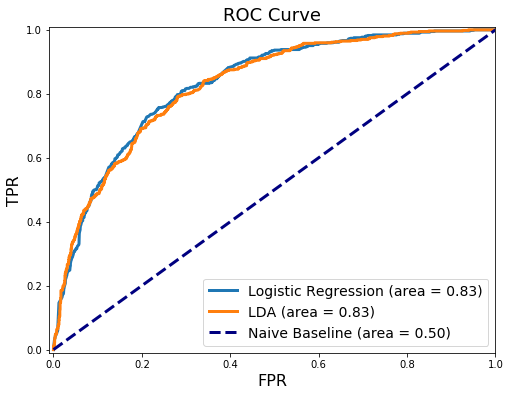

In [17]:
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda[:,1])
roc_auc_lda = auc(fpr_lda, tpr_lda)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot(fpr_lda, tpr_lda, lw=3, label='LDA (area = {:0.2f})'.format(roc_auc_lda))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()